# Aquisição e Leitura de Dados

In [1]:
# Carregando a biblioteca e permitindo acesso ao google drive
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


## Importando bibliotecas para análise dos dados

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import seaborn as sns

pd.options.display.float_format = "{:.2f}".format

## Carregando o dataset

In [134]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Pós-graduação/Fase 1/dataset/procedimentos_hospitalares_SUS.csv", encoding='ISO-8859-1', skiprows=3, sep=';', skipfooter=12, thousands='.', decimal=',', engine='python')

## Transformando o dataset

In [135]:
# Removendo a coluna total do dataset
df = df.iloc[:,:-1]

In [106]:
# Visualizando os dados
df.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,11273846.83,12443977.87,13054654.77,11275964.10,12083864.41,11556924.60,10276690.49,12334659.97,10561858.71,9729551.00
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,5124899.00,5692793.93,4561281.78,4019181.11,4150926.64,5712687.05,3503827.09,4308072.76,4092197.71,-
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,22198453.04,24809424.63,25005360.86,17522338.72,19666174.84,18823192.99,14608798.57,15832871.15,20050158.15,21880261.55
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3817361.58,4040988.99,4766375.31,1679849.33,2443674.72,3795465.55,2077360.03,2164371.02,2040590.11,2654012.71
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,45951158.29,54114992.86,50157844.79,51289069.37,50852598.69,55848595.60,56035364.16,48106384.61,48942117.39,49145936.67


In [109]:
# Visualizando os últimos dados
df.tail()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,...,113809028.30,116985178.63,120027121.08,116546657.80,122327620.35,114962110.61,114632478.21,122175213.25,112342301.17,120019056.88
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,...,26354221.47,26569066.08,27768462.56,28200723.03,26868302.10,27575792.21,27007266.84,27895211.84,24008820.06,24417603.48
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,...,24728541.29,24130933.81,22608901.38,23379073.20,22623239.98,22861422.56,20881292.23,23512718.75,21892477.36,22233668.98
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,...,44676392.00,53628779.29,51029574.01,50000216.73,50733817.38,48060632.27,51216453.07,51121518.19,46328543.90,53485779.00
26,53 Distrito Federal,4745919.19,7632480.67,9647203.26,11098732.99,12891719.72,12850125.67,12565646.74,13710857.89,13165106.20,...,28258576.00,29034177.33,30961244.28,31610313.47,29140330.80,30810835.09,29465293.81,31878001.55,29496708.95,28928216.50


In [110]:
# Visão geral do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 195 entries, Unidade da Federação to 2024/Mar
dtypes: float64(192), object(3)
memory usage: 41.3+ KB


In [111]:
# Visualizando o nome das colunas
df.columns

Index(['Unidade da Federação', '2008/Jan', '2008/Fev', '2008/Mar', '2008/Abr',
       '2008/Mai', '2008/Jun', '2008/Jul', '2008/Ago', '2008/Set',
       ...
       '2023/Jun', '2023/Jul', '2023/Ago', '2023/Set', '2023/Out', '2023/Nov',
       '2023/Dez', '2024/Jan', '2024/Fev', '2024/Mar'],
      dtype='object', length=195)

In [112]:
# Visualizando o tamanho do dataframe
df.shape

(27, 195)

In [136]:
# Transformar os dados para o formato "long"
df_long = df.melt(id_vars=["Unidade da Federação"], var_name="data", value_name="quantidade")

In [137]:
# Mapeamento dos meses em português e inglês para números
meses_map = {
    'Jan': 'Jan', 'Fev': 'Feb', 'Mar': 'Mar', 'Abr': 'Apr', 'Mai': 'May', 'Jun': 'Jun',
    'Jul': 'Jul', 'Ago': 'Aug', 'Set': 'Sep', 'Out': 'Oct', 'Nov': 'Nov', 'Dez': 'Dec'
}

# Substituir os nomes dos meses
for mes_pt, mes_num in meses_map.items():
    df_long['data'] = df_long['data'].str.replace(mes_pt, mes_num)

In [138]:
# Visualizando o resultado do código acima
df_long.head()

,Unidade da Federação,data,quantidade
0,11 Rondônia,2008/Jan,1388528.39
1,12 Acre,2008/Jan,902416.00
2,13 Amazonas,2008/Jan,4735529.42
3,14 Roraima,2008/Jan,657889.53
4,15 Pará,2008/Jan,18864744.11


In [140]:
# Convertendo para o tipo datetime a coluna "data"
df_long['data'] = pd.to_datetime(df_long['data'], format="%Y/%b")

In [147]:
# Criando uma coluna e convertendo para o tipo numerico a coluna "quantidade"
df_long['quantidade_numeric'] = pd.to_numeric(df_long['quantidade'], errors='coerce')

In [163]:
# Visualizando o resultado
df_long

,Unidade da Federação,data,quantidade
0,11 Rondônia,2008-01-01,1388528.39
1,12 Acre,2008-01-01,902416.00
2,13 Amazonas,2008-01-01,4735529.42
3,14 Roraima,2008-01-01,657889.53
4,15 Pará,2008-01-01,18864744.11
...,...,...,...
5233,43 Rio Grande do Sul,2024-03-01,120019056.88
5234,50 Mato Grosso do Sul,2024-03-01,24417603.48
5235,51 Mato Grosso,2024-03-01,22233668.98
5236,52 Goiás,2024-03-01,53485779.00


In [151]:
# Visualizando os tipos de dados
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5238 entries, 0 to 5237
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unidade da Federação  5238 non-null   object        
 1   data                  5238 non-null   datetime64[ns]
 2   quantidade            5238 non-null   object        
 3   quantidade_numeric    5236 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 163.8+ KB


In [154]:
# Encontrando os valores que tipo object da coluna quantidade
df_long.loc[df_long.quantidade_numeric.isnull(),:]

,Unidade da Federação,data,quantidade,quantidade_numeric
541,12 Acre,2009-09-01,-,NaN
5212,12 Acre,2024-03-01,-,NaN


In [155]:
# Substituir os valores "-" por 0 na coluna "quantidade"
df_long['quantidade'] = df_long['quantidade'].replace('-', 0)

In [159]:
# Convertendo o tipo da coluna "quantidade" para float64
df_long.quantidade = df_long.quantidade.astype('float64')

In [161]:
# Removendo a coluna criar para auxiliar na busca dos valores object da coluna "quantidade". (Removendo a coluna "quantidade_numeric")
df_long = df_long.iloc[:,:-1]

In [162]:
# Visualizando resultado das transformações
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5238 entries, 0 to 5237
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unidade da Federação  5238 non-null   object        
 1   data                  5238 non-null   datetime64[ns]
 2   quantidade            5238 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 122.9+ KB


# Visualização de dados

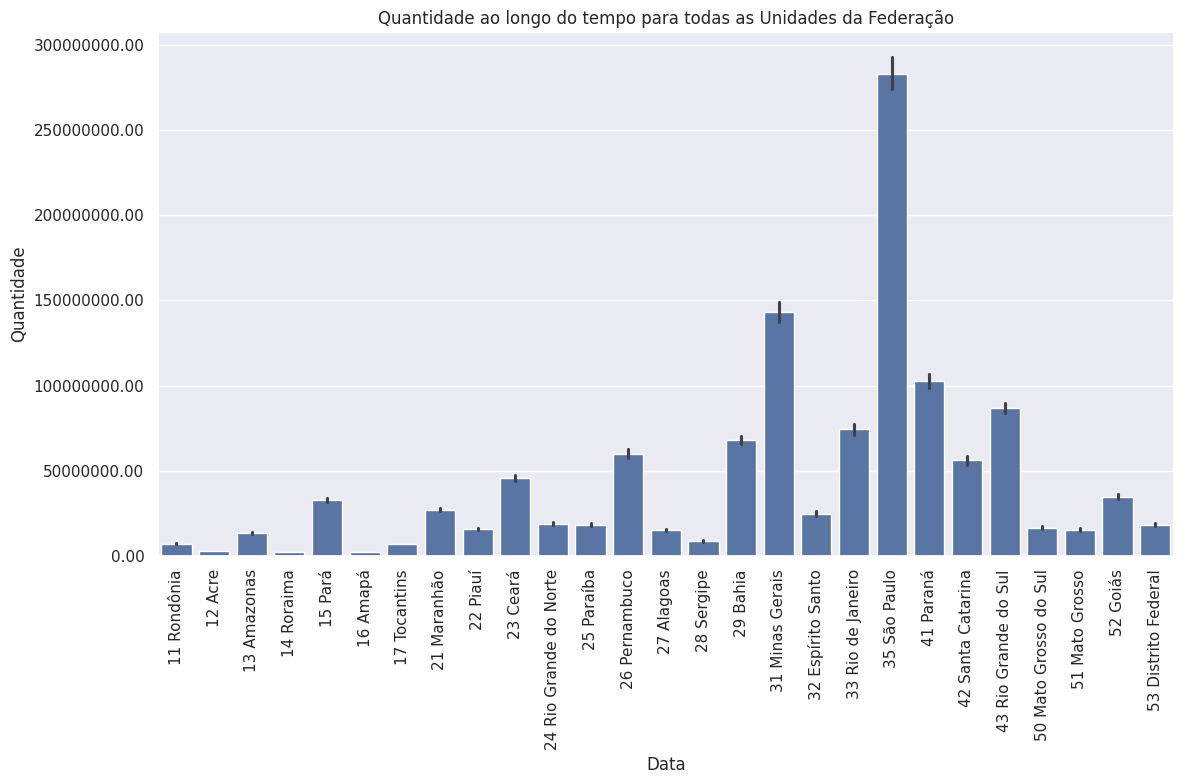

In [205]:
# Definindo o estilo do seaborn
sns.set(style="darkgrid")

# Plotar os dados para todas as unidades da federação
plt.figure(figsize=(12, 8))

# Gráfico
sns.barplot(data=df_long, x='Unidade da Federação', y='quantidade')

# Título principal, título do eixo X, e título do eixo y
plt.title('Quantidade ao longo do tempo para todas as Unidades da Federação')
plt.xlabel('Data')
plt.ylabel('Quantidade')

# Rotação dos rotulos do eixo X
plt.xticks(rotation=90)

# Formação dos valores no eixo Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.2f}'.format(x)))

plt.tight_layout()
plt.show()

### Visualização dos dados dos meses mais recentes

In [214]:
df_mes_recente = df_long[df_long['data'].dt.year == 2024]
df_mes_recente = df_mes_recente.sort_values(by='data', ascending=True)

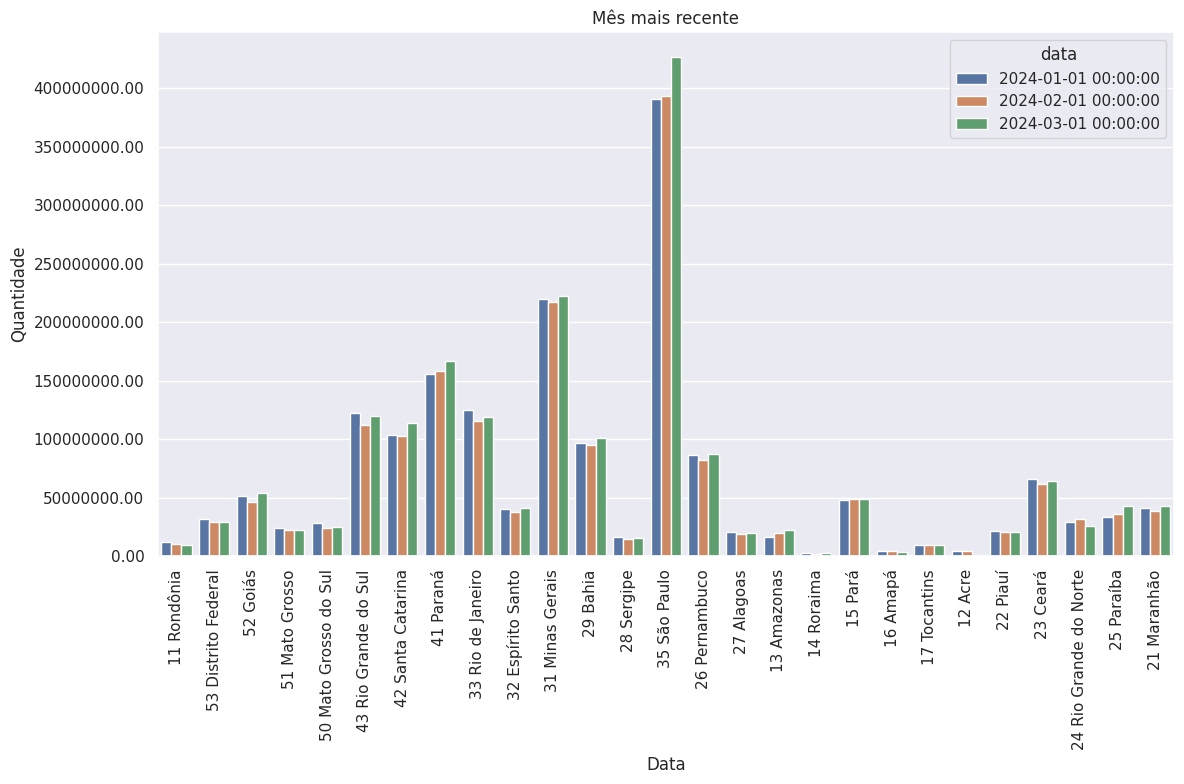

In [217]:
# Definindo o estilo do seaborn
sns.set(style="darkgrid")

# Plotar os dados para todas as unidades da federação
plt.figure(figsize=(12, 8))

# Gráfico
sns.barplot(data=df_mes_recente, x='Unidade da Federação', y='quantidade', hue='data')

# Título principal, título do eixo X, e título do eixo y
plt.title('Mês mais recente')
plt.xlabel('Data')
plt.ylabel('Quantidade')

# Rotação dos rotulos do eixo X
plt.xticks(rotation=90)

# Formação dos valores no eixo Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.2f}'.format(x)))

plt.tight_layout()
plt.show()

# Manipulação de dados